In [1]:
from a6_utils import *
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
import os

In [2]:

# (a)  Data preparation: Firstly, we have to formulate the problem in a way that is
# compatible with the PCA method.

def read_images(i):
    image_matrix = []
    directory_path = os.path.join('data', "faces", str(i))
    image_files = [img for img in os.listdir(directory_path)]
    sorted_image_files = sorted(
        image_files, key=lambda x: int(x.split('.')[0]))
    for img in sorted_image_files:
        image_path = os.path.join(directory_path, img)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE).flatten()
        image_matrix.append(image)
    return np.array(image_matrix)


matrix = read_images(1)

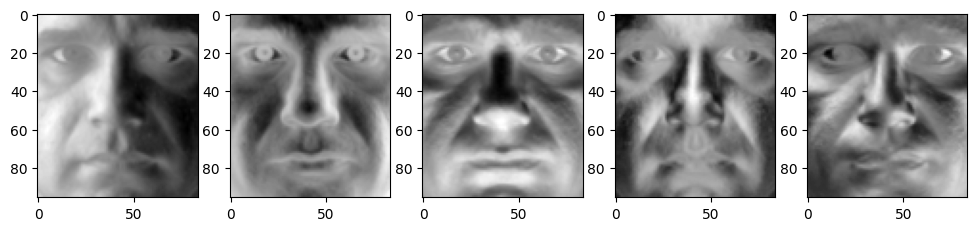

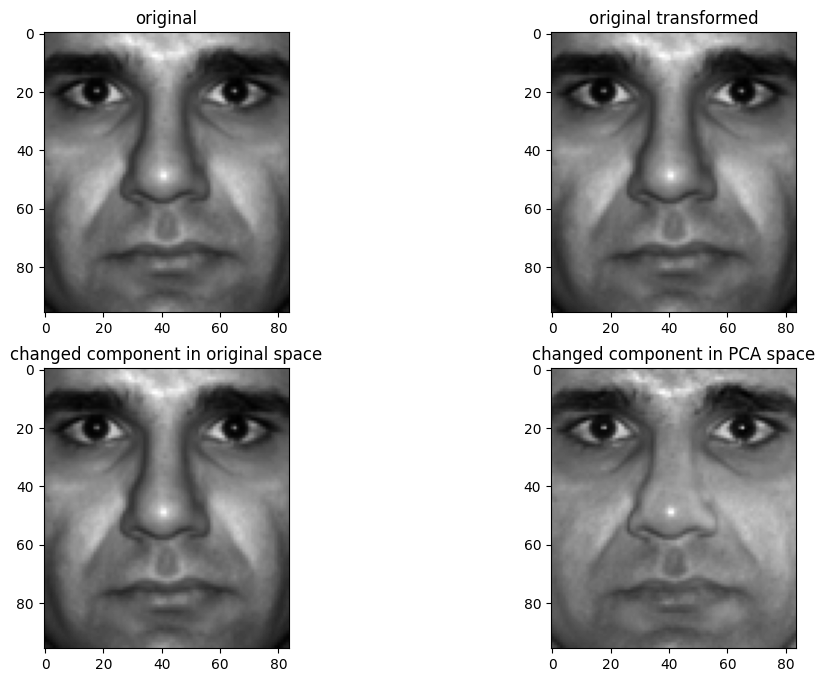

In [3]:
# (b) Using dual PCA: Use dual PCA on the vectors of images. Write a function that takes the matrix of
# image vectors as input and returns the eigenvectors of the PCA subspace and the mean of the input data.

points = matrix
N = len(points)
X = points.T
mean = np.mean(X, axis=1, keepdims=True)
Xd = X - mean
C2 = np.dot(Xd.T, Xd) / (N - 1)
U, S, VT = np.linalg.svd(C2)
S = S + 10**-15
U = np.dot(Xd, U) * np.sqrt(1 / (S * (N - 1)))
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(U[:, i].reshape((96, 84)), cmap="gray")
plt.show()

image1 = matrix[0]
image1_changed = image1.copy()
image1_changed[4074] = 0

Y = np.dot(U.T, image1.reshape((-1, 1)) - mean)
Xq = np.dot(U, Y) + mean
Y1 = np.dot(U.T, image1_changed.reshape((-1, 1)) - mean)
Xq1 = np.dot(U, Y1) + mean
Y2 = Y.copy()
Y2[1] = 0
Xq2 = np.dot(U, Y2) + mean

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title("original")
plt.imshow(image1.reshape((96, 84)), cmap="gray")
plt.subplot(2, 2, 2)
plt.title("original transformed")
plt.imshow(Xq.reshape((96, 84)), cmap="gray")
plt.subplot(2, 2, 3)
plt.title("changed component in original space")
plt.imshow(Xq1.reshape((96, 84)), cmap="gray")
plt.subplot(2, 2, 4)
plt.title("changed component in PCA space")
plt.imshow(Xq2.reshape((96, 84)), cmap="gray")
plt.show()


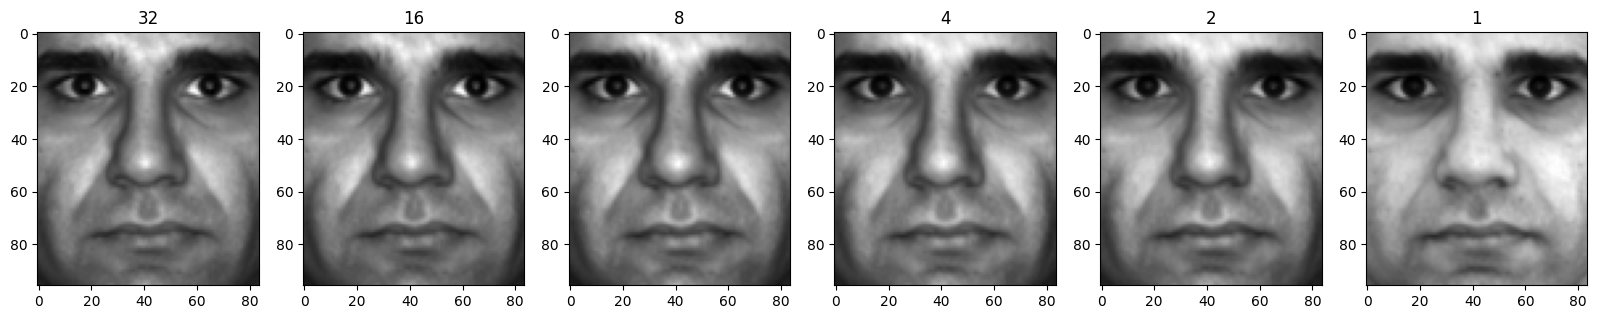

In [4]:
# (c) Effect of the number of components on the reconstruction
plt.figure(figsize=(20, 5))
for i in range(6):
    p = 2**(5 - i)
    Y[p:] = 0
    Xq = np.dot(U, Y) + mean
    plt.subplot(1, 6, i+1)
    plt.title(str(p))
    plt.imshow(Xq.reshape((96, 84)), cmap="gray")
plt.show()
